In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
# 0 - 레드와인, 1 - 화이트와인

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
wine_data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine['class'].to_numpy()

In [7]:
# 훈련세트, 테스트 세트
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    wine_data, wine_target, test_size=0.2, random_state=42
)

In [8]:
from sklearn.tree import DecisionTreeClassifier # 결정 트리 분류기

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
print("훈련세트:", dt.score(train_input,train_target))
print("테스트세트:", dt.score(test_input, test_target))

훈련세트: 0.996921300750433
테스트세트: 0.8584615384615385


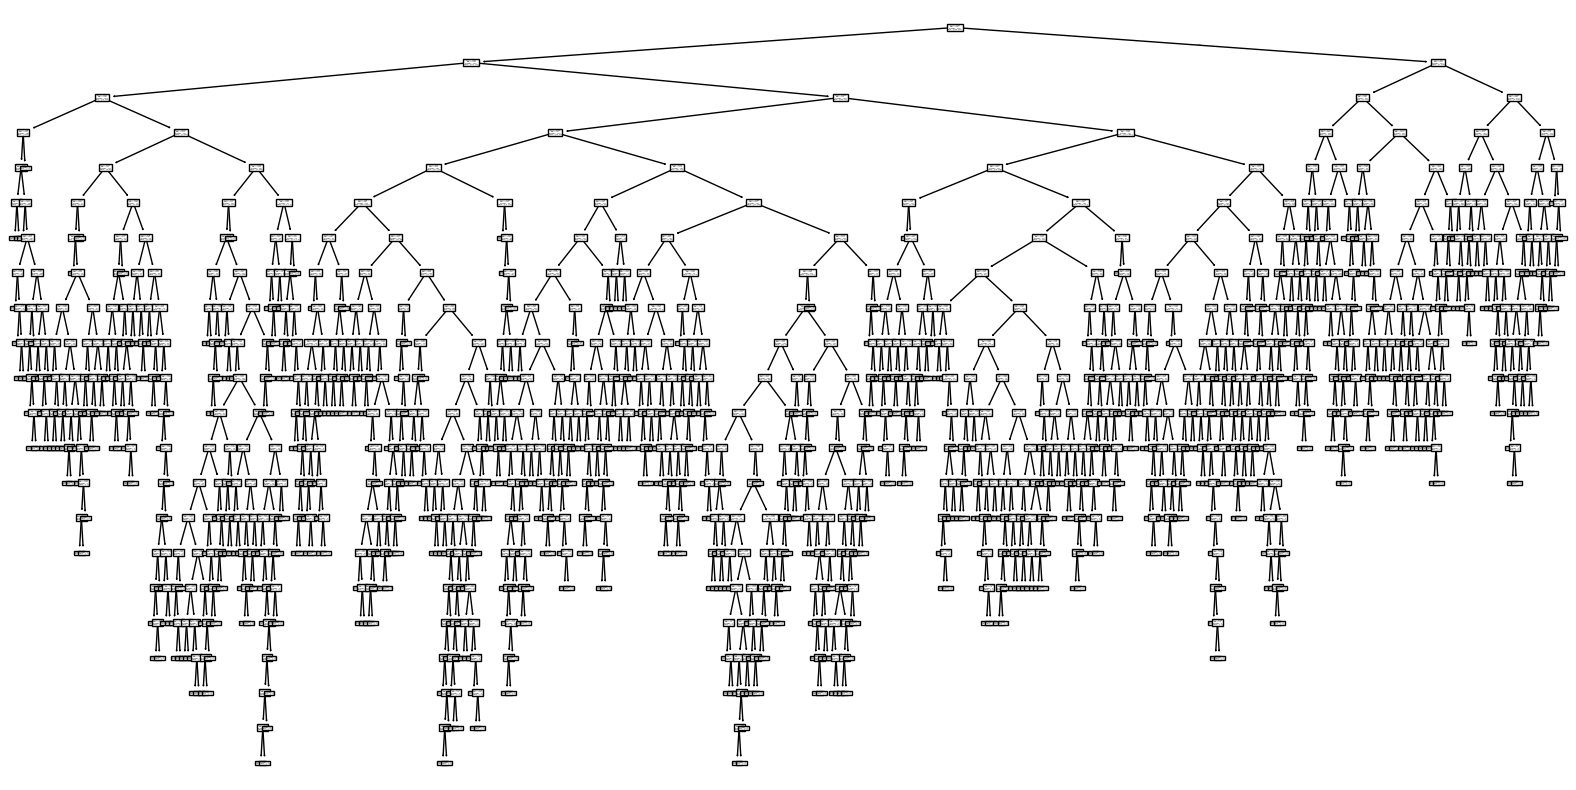

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt)
plt.show()

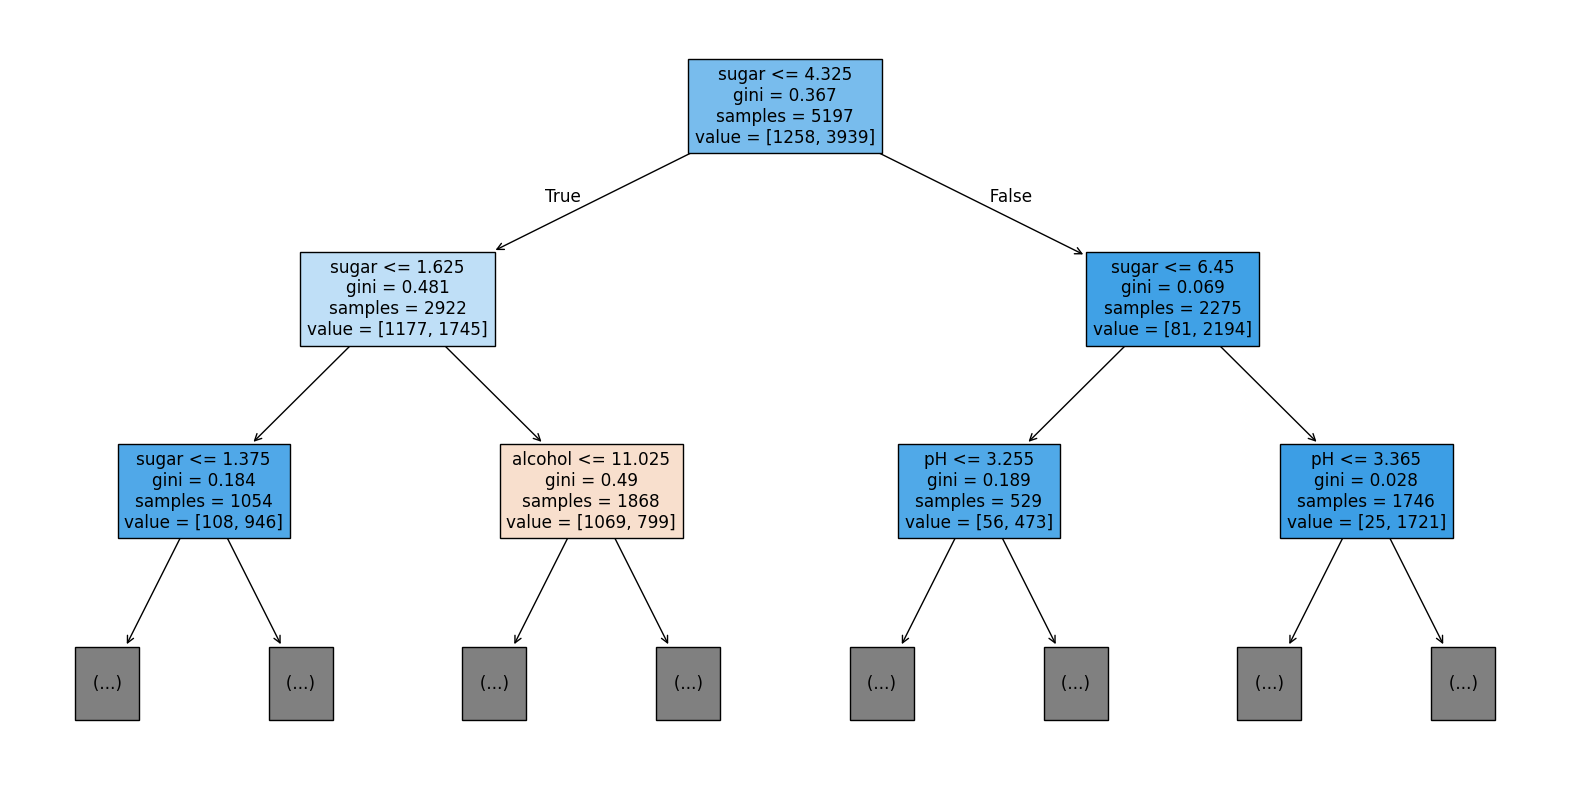

In [13]:
plt.figure(figsize=(20,10))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [21]:
# 노드의 성장을 막는 방법 - 가지치기 / 과대적합을 막고 보다 일반적인 모델로 학습 가능
# max_depth
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print("훈련세트:", dt.score(train_input,train_target))
print("테스트세트:", dt.score(test_input,test_target))

훈련세트: 0.8454877814123533
테스트세트: 0.8415384615384616


In [22]:
# GridSearchCV로 최적의 max_depth를 찾아보자!
import numpy as np
from sklearn.model_selection import GridSearchCV
params = {'max_depth': np.arange(2,10)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

gs.fit(train_input,train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': array([2, 3, ..., 6, 7, 8, 9])}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [23]:
np.mean(gs.cv_results_['mean_test_score'])

np.float64(0.849289465647442)

In [24]:
dt = gs.best_estimator_

print("훈련세트:", dt.score(train_input,train_target))
print("테스트세트:", dt.score(test_input,test_target))

훈련세트: 0.9003271117952665
테스트세트: 0.8584615384615385


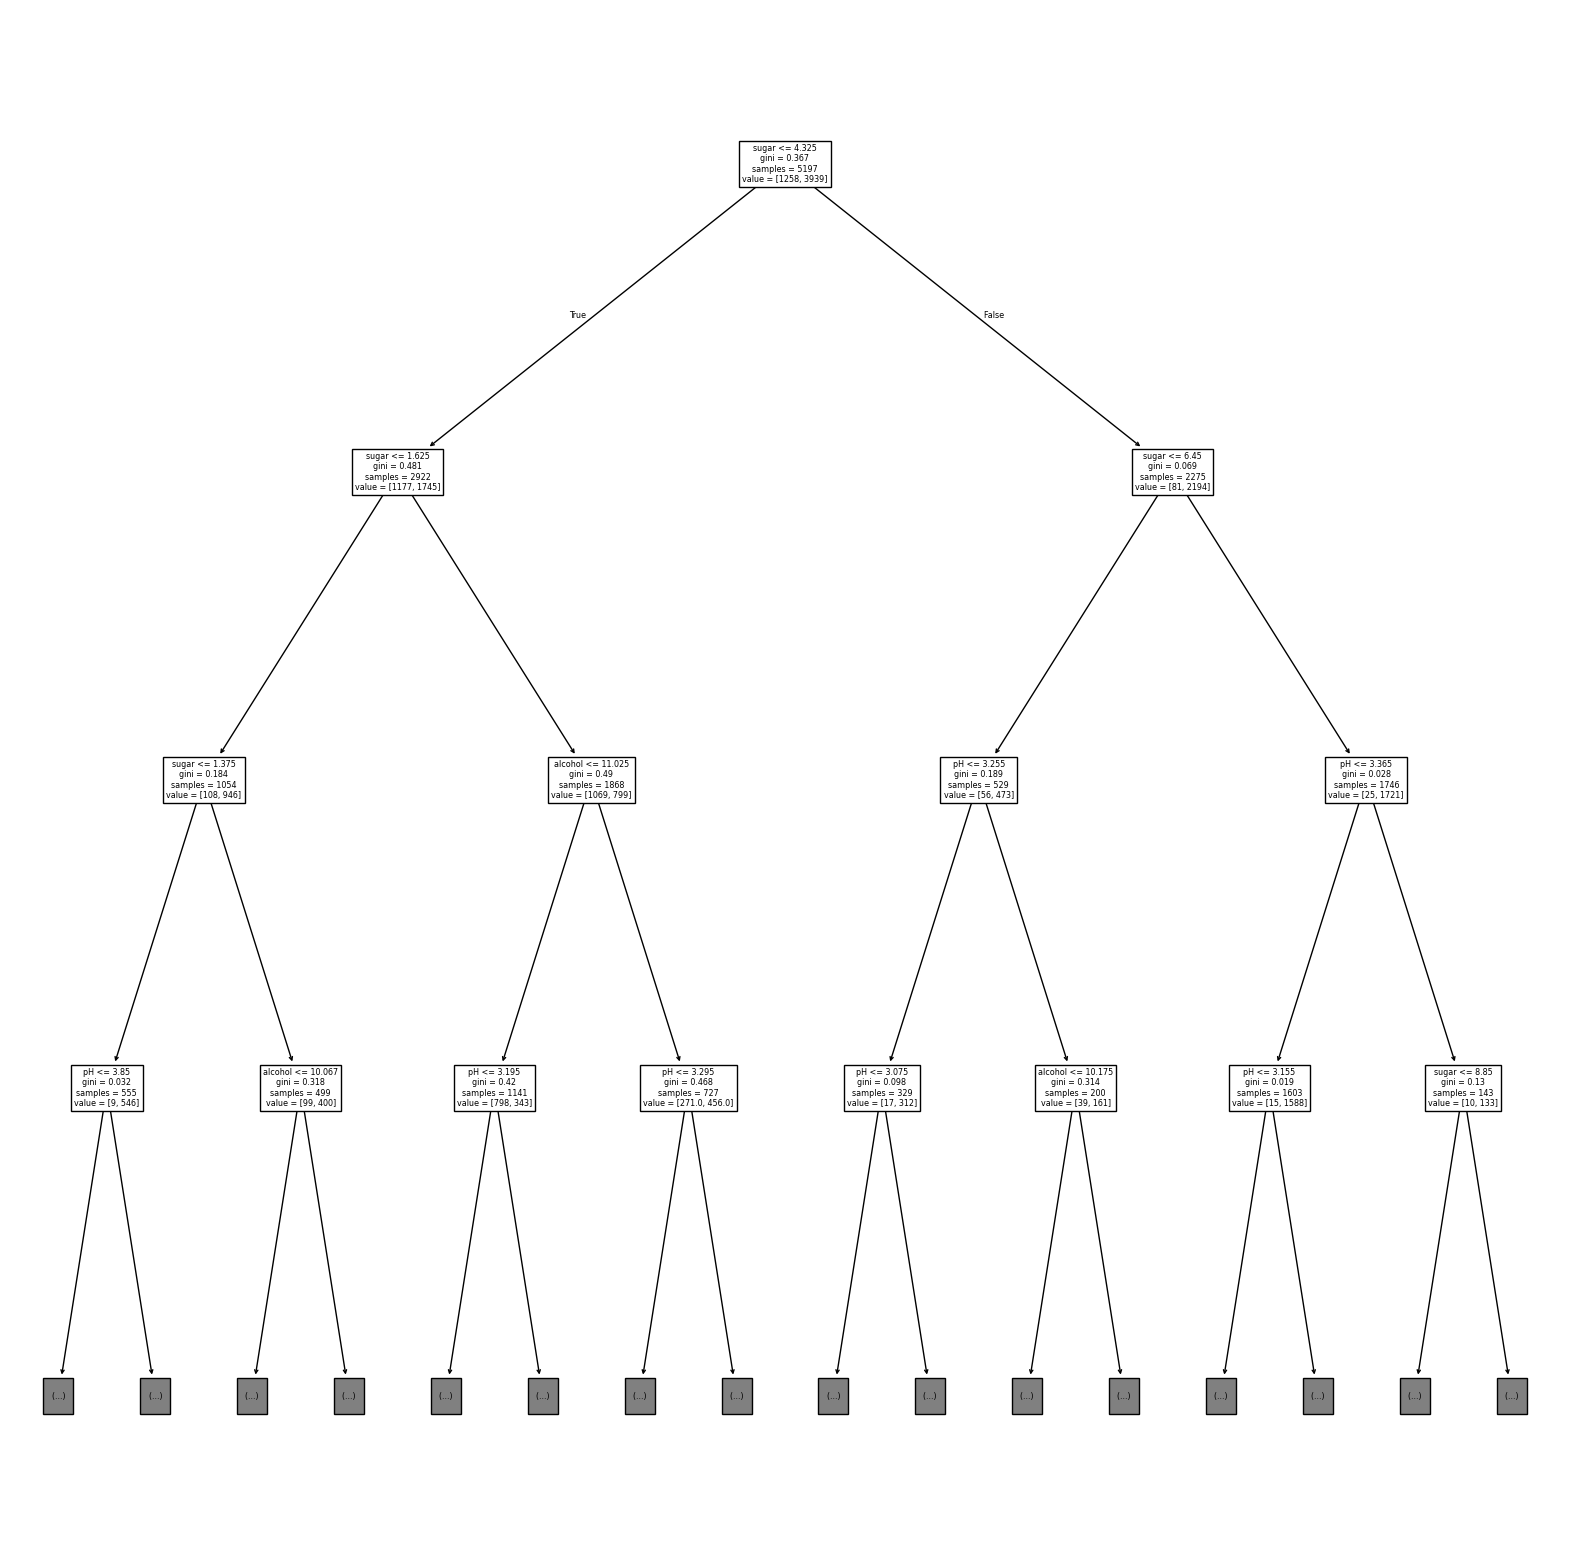

In [26]:
plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=3, feature_names=['alcohol','sugar','pH'])
plt.show()

In [27]:
# 특성 중요도
dt.feature_importances_

array([0.17976778, 0.65284899, 0.16738324])